# Exam: Getting Started

This notebook accompanies the 2021 exam in Advanced Microeconometrics. You are not required to use this notebook, it is purely to help you get started with the data. 

**Note:** Make sure that you put the two files, `cross_section.csv` and `panel.csv`, are in the same directory as this notebook. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Cross-sectional dataset

This dataset just has the variables, `y`, `x1` (the constant), `x2` (the binary variable), and `x3` (the continuous variable). 

In [2]:
cs = pd.read_csv('cross_section.csv')
cs.head(5)

,y,x1,x2,x3
0,1.383056,1.0,1.0,0.087482
1,-0.083102,1.0,1.0,0.227310
2,1.260095,1.0,0.0,0.314377
3,4.212061,1.0,0.0,0.174766
4,0.620480,1.0,1.0,0.607094


Let us have a very raw look at the data, splitting on the binary variable and plotting over the continuous. 

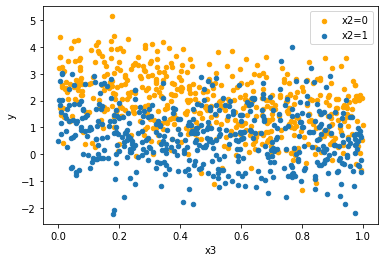

In [3]:
fig,ax = plt.subplots(); 
cs[cs.x2==0].plot.scatter(x='x3', y='y', ax=ax, label='x2=0', color='orange');
cs[cs.x2==1].plot.scatter(x='x3', y='y', ax=ax, label='x2=1');

In [4]:
# convert to numpy arrays 
y = cs['y'].values
x = cs[['x1', 'x2', 'x3']].values

In [5]:
N,K = x.shape

# Panel dataset

This dataset contains $N=100$ individuals observed for $T = 10$ periods. In addition to the variables `y`, `x1`, `x2`, `x3`, this dataset also contains the variable `i` (denoting individuals), and `t` (denoting time). You do not need to use `i` and `t` in your code; it is included to help make clear the panel structure and the sorting of the dataset.  

In [6]:
p = pd.read_csv('panel.csv')
p.head(12)

,i,t,y,x1,x2,x3
0,0,0,1.179576,1.0,1.0,0.087482
1,0,1,1.247117,1.0,1.0,0.227310
2,0,2,2.031343,1.0,0.0,0.314377
3,0,3,1.914893,1.0,0.0,0.174766
4,0,4,0.109162,1.0,1.0,0.607094
5,0,5,0.683711,1.0,1.0,0.413586
6,0,6,0.648328,1.0,1.0,0.816352
7,0,7,0.597955,1.0,1.0,0.185130
8,0,8,0.784681,1.0,1.0,0.701877
9,0,9,1.974238,1.0,0.0,0.240356


Let us have a very raw look at the data, splitting on the binary variable and plotting over the continuous. 

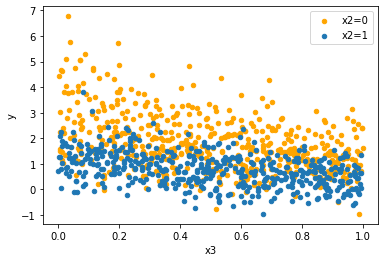

In [7]:
fig,ax = plt.subplots(); 
p[p.x2==0].plot.scatter(x='x3', y='y', ax=ax, label='x2=0', color='orange');
p[p.x2==1].plot.scatter(x='x3', y='y', ax=ax, label='x2=1');

Note that the dataset is sorted in such a way that when we use `.reshape(N,T)` on a column, we get that each row contains the $T$ observations belonging to that individual. 

In [8]:
N = p['i'].nunique() # no. unique values of personal identifier 
T = p['t'].nunique() # no. unique values of tim 
x_vars = ['x1', 'x2', 'x3']
K = len(x_vars)

# extract as numpy objects 
y = p['y'].values.reshape(N,T) # (N,T) array 
x = p[x_vars].values.reshape(N,T,K) # (N,T,K) array 

# depending on your coding preferences, you may choose to work 
# with the data in "tall" N*T arrays; here is how: 
# y = y.reshape(N*T, )
# x = x.reshape(N*T, K)

In [9]:
x.shape

(100, 10, 3)